In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [57]:
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

In [58]:
df = pd.read_csv("Debernardi et al 2020 data.csv")

In [59]:
df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [61]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [62]:
label_encoder = preprocessing.LabelEncoder()

In [63]:
df["patient_cohort"].unique()
# Cohort 1 = previously used samples
# Cohort 2 = newly added samples

array(['Cohort1', 'Cohort2'], dtype=object)

In [64]:
df["patient_cohort"] = label_encoder.fit_transform(df["patient_cohort"])
df["patient_cohort"] = df["patient_cohort"].astype(np.int64)

In [65]:
df["sample_origin"].unique()

array(['BPTB', 'LIV', 'ESP', 'UCL'], dtype=object)

In [66]:
df["sample_origin"] = label_encoder.fit_transform(df["sample_origin"])
df["sample_origin"] = df["sample_origin"].astype(np.int64)

In [67]:
df["age"] = label_encoder.fit_transform(df["age"])

In [68]:
df["sex"] = label_encoder.fit_transform(df["sex"])
df["sex"] = df["sex"].astype(np.int64)

In [69]:
df["diagnosis"].unique()
# 1 = control (no pancreatic disease)
# 2 = benign hepatobiliary disease (119 of which are chronic pancreatitis)
# 3 = pancreatic ductal adenocarcinoma (pancreatic cancer)

array([1, 2, 3], dtype=int64)

In [70]:
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])

In [71]:
df["stage"] = df["stage"].fillna('0')

In [72]:
df["stage"].unique()
# Stage of those with pancreatic cancer

array(['0', 'I', 'IA', 'IB', 'II', 'IIA', 'IIB', 'III', 'IV'],
      dtype=object)

In [73]:
df["stage"] = label_encoder.fit_transform(df["stage"])
df["stage"] = df["stage"].astype(np.int64)

In [74]:
df["benign_sample_diagnosis"] = df["benign_sample_diagnosis"].fillna("Null")

In [75]:
df["benign_sample_diagnosis"].unique()
# Diagnosis of those with benign, con=cancerous diagnosis

array(['Null', 'Abdominal Pain ',
       'Biliary Stricture (Secondary to Stent) ', 'Cholecystitis',
       'Cholecystitis ', 'Cholecystitis (Chronic) ',
       'Cholecystitis (Chronic) Cholelithiasis',
       'Cholecystitis (Chronic) Cholesterolsis', 'Choledochal Cyst ',
       'Choledocholiathiasis', 'Choledocholiathiasis ',
       'Cholelithiasis with adenomyomatous hyperplasia ',
       'Duodenal Stricture', 'Duodenitis', 'Gallbladder polyps ',
       'Gallbladder Porcelain', 'Gallstones', 'Gallstones ',
       'Gallstones - Incidental ', 'Gastritis ', 'Gastritis and Reflux ',
       'Ill defined lesion in uncinate process',
       'Ischaemic Common Bile Duct Stricture',
       'Pancreatitis (Pseudocyst)', 'Pancreatitis', 'Pancreatitis ',
       'Pancreatitis (Abscess)', 'Pancreatitis (Acute)',
       'Pancreatitis (Alcohol-Chronic-Pseuodcyst)',
       'Pancreatitis (Alcohol-Chronic)', 'Pancreatitis (Alcohol)',
       'Pancreatitis (Autoimmune) ', 'Pancreatitis (Chronic-Pseudocyst)

In [76]:
df["benign_sample_diagnosis"] = label_encoder.fit_transform(df["benign_sample_diagnosis"])
df["benign_sample_diagnosis"] = df["benign_sample_diagnosis"].astype(np.int64)

In [77]:
df["plasma_CA19_9"] = df["plasma_CA19_9"].fillna(df["plasma_CA19_9"].mean())

In [78]:
df["REG1A"] = df["REG1A"].fillna(df["REG1A"].mean())

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    int64  
 2   sample_origin            590 non-null    int64  
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    int64  
 5   diagnosis                590 non-null    int64  
 6   stage                    590 non-null    int64  
 7   benign_sample_diagnosis  590 non-null    int64  
 8   plasma_CA19_9            590 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    590 non-null    float64
dtypes: float64(6), int64(7), o

In [80]:
X = df.copy()

In [81]:
X = X.drop("sample_id", axis=1)
X = X.drop("diagnosis", axis=1)
X = X.drop("stage", axis=1)
X = X.drop("benign_sample_diagnosis", axis=1)

In [82]:
X

,patient_cohort,sample_origin,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,6,0,11.700000,1.83222,0.893219,52.948840,654.282174,1262.000000
1,0,0,54,0,654.002944,0.97266,2.037585,94.467030,209.488250,228.407000
2,1,0,24,1,7.000000,0.78039,0.145589,102.366000,461.141000,735.281222
3,1,0,34,1,8.000000,0.70122,0.002805,60.579000,142.950000,735.281222
4,1,0,35,1,9.000000,0.21489,0.000860,65.540000,41.088000,735.281222
...,...,...,...,...,...,...,...,...,...,...
585,1,0,41,1,654.002944,0.52026,7.058209,156.241000,525.178000,735.281222
586,1,0,44,0,654.002944,0.85956,8.341207,16.915000,245.947000,735.281222
587,1,0,36,1,654.002944,1.36851,7.674707,289.701000,537.286000,735.281222
588,1,0,48,0,654.002944,1.33458,8.206777,205.930000,722.523000,735.281222


In [83]:
y = df["diagnosis"]

In [84]:
y

0      0
1      0
2      0
3      0
4      0
      ..
585    2
586    2
587    2
588    2
589    2
Name: diagnosis, Length: 590, dtype: int64

In [85]:
y = label_encoder.fit_transform(y)

<Axes: >

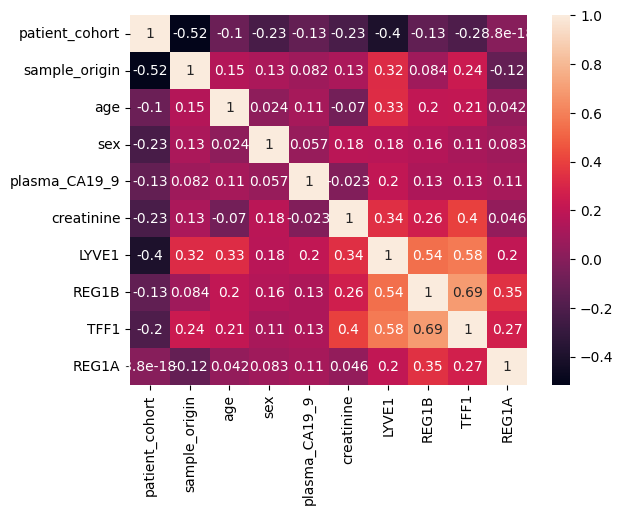

In [86]:
cor = X.corr()

plt.figure()
sns.heatmap(cor, annot=True)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2901)

In [88]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf_clf.score(X_test, y_test) * 100

70.94594594594594

In [89]:
# Gradient Boosting Classifier
gbc_clf = GradientBoostingClassifier().fit(X_train, y_train)
gbc_clf.score(X_test, y_test) * 100

75.0

In [90]:
# Gaussian Naive Bayes Classifier
gbc_clf = GaussianNB().fit(X_train, y_train)
gbc_clf.score(X_test, y_test) * 100

53.37837837837838

In [91]:
# K Nearest Neighbours Classifier
knn_clf = neighbors.KNeighborsClassifier().fit(X_train, y_train)
knn_clf.score(X_test, y_test) * 100

56.08108108108109

In [92]:
# Support Vector Machine Classifier
svm_clf = svm.SVC(kernel="linear").fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.668918918918919

In [93]:
# XBoost Classifier
xgb_clf = XGBClassifier(objective='binary:logistic', booster='gblinear').fit(X_train, y_train)
xgb_clf.score(X_test, y_test) * 100

67.56756756756756

In [105]:
# Logistic Regression Classifier
lrc_clf = LogisticRegression(max_iter=6000).fit(X_train, y_train)
lrc_clf.score(X_test, y_test) * 100

66.21621621621621

In [97]:
# Decision Tree Classifier
dtc_clf = DecisionTreeClassifier().fit(X_train, y_train)
dtc_clf.score(X_test, y_test) * 100

58.78378378378378